<a href="https://colab.research.google.com/github/SheilaLiborio/Desafio_qualidade_de_sono/blob/main/Desafio_Final_qualidade_sono.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafio Final : Qualidade do Sono**

**Contexto:**
Você trabalha como cientista de dados para uma empresa de saúde digital.
Seu time recebeu um conjunto de dados de um estudo com adultos que
monitoraram seus hábitos de vida e padrões de sono. A empresa deseja
desenvolver um sistema de alerta para pessoas com potencial risco de má
qualidade de sono.
**Objetivo:**
Construir um modelo de machine learning que classifique a qualidade dosono (por exemplo,"Boa","Moderada","Ruim") com base em variáveis de estilo de vida e saúde. Onde:
- Ruim - 0-4
- Moderada - 5-6
- Boa - 7-10

# 1.Carregando os pacotes








In [ ]:
#importando as bibliotecas
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

import panel as pn
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from ipywidgets import widgets, VBox, Tab

#2.Leitura dos dados

In [ ]:
# lendo dos dados csv
df_sono= pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep = ",")

In [ ]:
### leitura das 10 primeiras linhas
df_sono.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


#3.Análise inicial dos dados

In [ ]:
# numero de obsersacoes
print(df_sono.shape[0])

374


In [ ]:
## verificando a estrutura básica
print(df_sono.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


In [ ]:
#verificando a quantidade de nulos e valores unicos
datadict = pd.DataFrame(df_sono.dtypes)
datadict.columns = ["Dtype"]
datadict['Valores_Nulos'] = df_sono.isnull().sum()
datadict['%_Valores_Nulos'] = (df_sono.isnull().sum() / df_sono.shape[0]) * 100
datadict['NUnique']=df_sono.nunique()

datadict

,Dtype,Valores_Nulos,%_Valores_Nulos,NUnique
Person ID,int64,0,0.00000,374
Gender,object,0,0.00000,2
Age,int64,0,0.00000,31
Occupation,object,0,0.00000,11
Sleep Duration,float64,0,0.00000,27
Quality of Sleep,int64,0,0.00000,6
Physical Activity Level,int64,0,0.00000,16
Stress Level,int64,0,0.00000,6
BMI Category,object,0,0.00000,4
Blood Pressure,object,0,0.00000,25


In [ ]:
## verificando estatísticas descritivas
print("\n Estatísticas descritivas:")
print(df_sono.describe())


 Estatísticas descritivas:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%

#4.Gráfico - Distribuicao das Variaveis

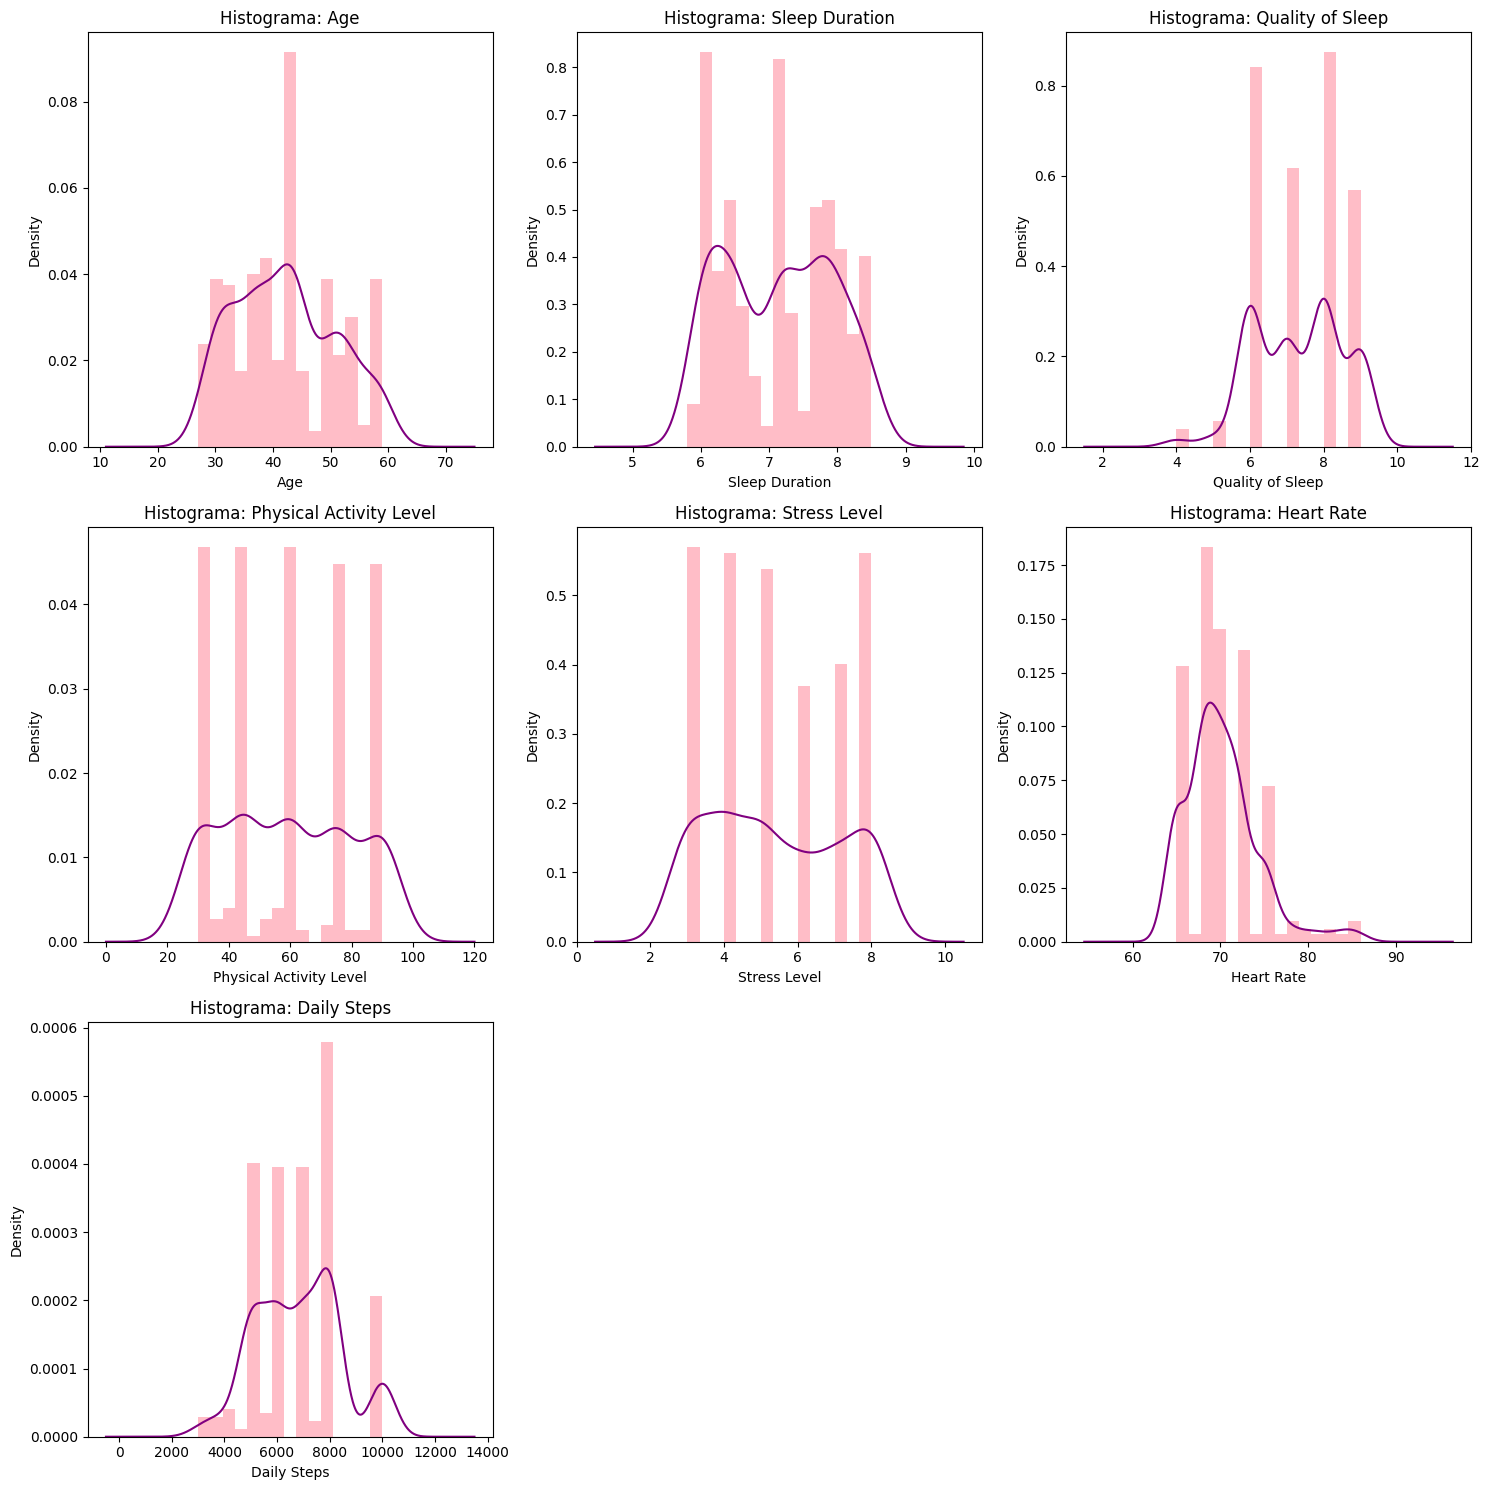

In [ ]:
# Selecionando apenas colunas numéricas, exceto a coluna 'Person ID'
num_cols = df_sono.select_dtypes(include=['number']).columns.drop('Person ID')
n = len(num_cols)
rows = (n // 3) + 1  # 3 plots por linha

plt.figure(figsize=(15, 5 * rows))

# Criando histograma + densidade para cada coluna numérica
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    ax = df_sono[col].hist(bins=15, density=True, stacked=True, color='lightpink', alpha=0.9)
    df_sono[col].plot(kind='density', color='purple')
    ax.set(xlabel=col)
    ax.set_title(f"Histograma: {col}")

plt.tight_layout()
plt.show()

## Análise Inicial
---
- A base de dados analisada é relativamente pequena, com **374 observações**.
- Verificou-se que as variáveis **categóricas** encontram-se no formato *string*; para que o modelo as interprete corretamente, será necessário convertê-las em **numéricas** por meio de codificação.
- Constatou-se que a variável **Sleep Disorder** apresenta aproximadamente **59% de valores ausentes**, os quais deverão ser tratados previamente à modelagem.
- A variável **Blood Pressure** também requer tratamento específico para que possa ser considerada na análise.
- Observou-se que nenhuma variável apresenta distribuição normal.




#5.Limpeza dos dados

##Sleep Disorder

In [ ]:
#Atribuindo uma nova categoria "Sem Distúrbio" para os valores ausentes da coluna Sleep Disorder
df_sono['Sleep Disorder'] = df_sono['Sleep Disorder'].fillna('Sem Distúrbio')

In [ ]:
print('Distribuição por categoria de distúrbio do sono:')
print(df_sono['Sleep Disorder'].value_counts())

Distribuição por categoria de distúrbio do sono:
Sleep Disorder
Sem Distúrbio    219
Sleep Apnea       78
Insomnia          77
Name: count, dtype: int64


##Blood Pressure

In [ ]:
# Separando Blood Pressure em Systolic'e 'Diastolic
df_sono[['Systolic', 'Diastolic']] = df_sono['Blood Pressure'].str.split('/', expand=True).astype(int)

# Removendo a coluna original
df_sono.drop('Blood Pressure', axis=1, inplace=True)

In [ ]:
# classificando a pressao arterial em categorias de acordo com a OMS
def classificar_pressao_oms(row):
    sbp = row['Systolic']
    dbp = row['Diastolic']

    if sbp < 90 or dbp < 60:
        return 'Hipotensão'
    elif sbp < 120 and dbp < 80:
        return 'Normal'
    elif 120 <= sbp <= 129 or 80 <= dbp <= 84:
        return 'Normal Alta'
    elif 130 <= sbp <= 139 or 85 <= dbp <= 89:
        return 'Pré-hipertensão'
    elif 140 <= sbp <= 159 or 90 <= dbp <= 99:
        return 'Hipertensão Estágio 1'
    elif 160 <= sbp <= 179 or 100 <= dbp <= 109:
        return 'Hipertensão Estágio 2'
    elif sbp >= 180 or dbp >= 110:
        return 'Hipertensão Estágio 3'
    else:
        return 'Indefinida'

df_sono['Pressao_Arterial_OMS'] = df_sono.apply(classificar_pressao_oms, axis=1)

In [ ]:
# verificando a quantidade de registros em cada categoria
df_sono['Pressao_Arterial_OMS'].value_counts()

,count
Pressao_Arterial_OMS,
Pré-hipertensão,137
Normal Alta,125
Hipertensão Estágio 1,71
Normal,41


#6.Diferenças Entre os Grupos

##6.1.Mulheres X Homens

In [ ]:
#Separando o grupo de mulheres e homens
df_sono_homens = df_sono[df_sono['Gender'] == 'Male']
df_sono_mulheres = df_sono[df_sono['Gender'] == 'Female']

In [ ]:
#Graficos comparativos entre os dois grupos, considerando todas as variaveis.
pn.extension('plotly')

tabs = []

for col in num_cols:
    fig = px.box(
        df_sono,
        x='Gender',
        y=col,
        color='Gender',
        title=f'Boxplot: {col} por Gender',
        #points="all",
        template="plotly_white"
    )
    tabs.append((col, pn.pane.Plotly(fig, config={'responsive': True})))

pn.Tabs(*tabs).servable()

/tmp/ipython-input-15-2196416818.py:2: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  pn.extension('plotly')


Tabs
    [0] Plotly(Figure, config={'responsive': True})
    [1] Plotly(Figure, config={'responsive': True})
    [2] Plotly(Figure, config={'responsive': True})
    [3] Plotly(Figure, config={'responsive': True})
    [4] Plotly(Figure, config={'responsive': True})
    [5] Plotly(Figure, config={'responsive': True})
    [6] Plotly(Figure, config={'responsive': True})

In [ ]:
# Médias por gênero
df_sono.groupby('Gender')[['Sleep Duration','Age', 'Physical Activity Level', 'Heart Rate','Daily Steps', 'Stress Level']].mean()

,Sleep Duration,Age,Physical Activity Level,Heart Rate,Daily Steps,Stress Level
Gender,,,,,,
Female,7.229730,47.405405,59.140541,69.259459,6840.540541,4.675676
Male,7.036508,37.074074,59.201058,71.052910,6793.650794,6.079365


##6.2.Faixas Etárias

In [ ]:
# Criando as faixas considerando a idade máxima
bins = [18, 30, 45, 60]
labels = ['19-30', '31-45', '46-59']

df_sono['Faixa Etária'] = pd.cut(df_sono['Age'], bins=bins, labels=labels, right=False)

In [ ]:
pn.extension('plotly')

tabs = []

for col in num_cols:
    fig = px.box(
        df_sono,
        x='Faixa Etária',
        y=col,
        color='Faixa Etária',
        title=f'Boxplot: {col} por Faixa Etária',
        #points="all",
        template="plotly_white"
    )
    tabs.append((col, pn.pane.Plotly(fig, config={'responsive': True})))

pn.Tabs(*tabs).servable()

/tmp/ipython-input-18-2092002994.py:1: UserWarning:

Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.



Tabs
    [0] Plotly(Figure, config={'responsive': True})
    [1] Plotly(Figure, config={'responsive': True})
    [2] Plotly(Figure, config={'responsive': True})
    [3] Plotly(Figure, config={'responsive': True})
    [4] Plotly(Figure, config={'responsive': True})
    [5] Plotly(Figure, config={'responsive': True})
    [6] Plotly(Figure, config={'responsive': True})

# 7.Analise Pré Modelagem

##7.1.Variáveis Numéricas

### Correlacao

In [ ]:
# Calcular a correlação entre todas as colunas numéricas
corr_matrix = df_sono[num_cols].corr()
corr_matrix

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


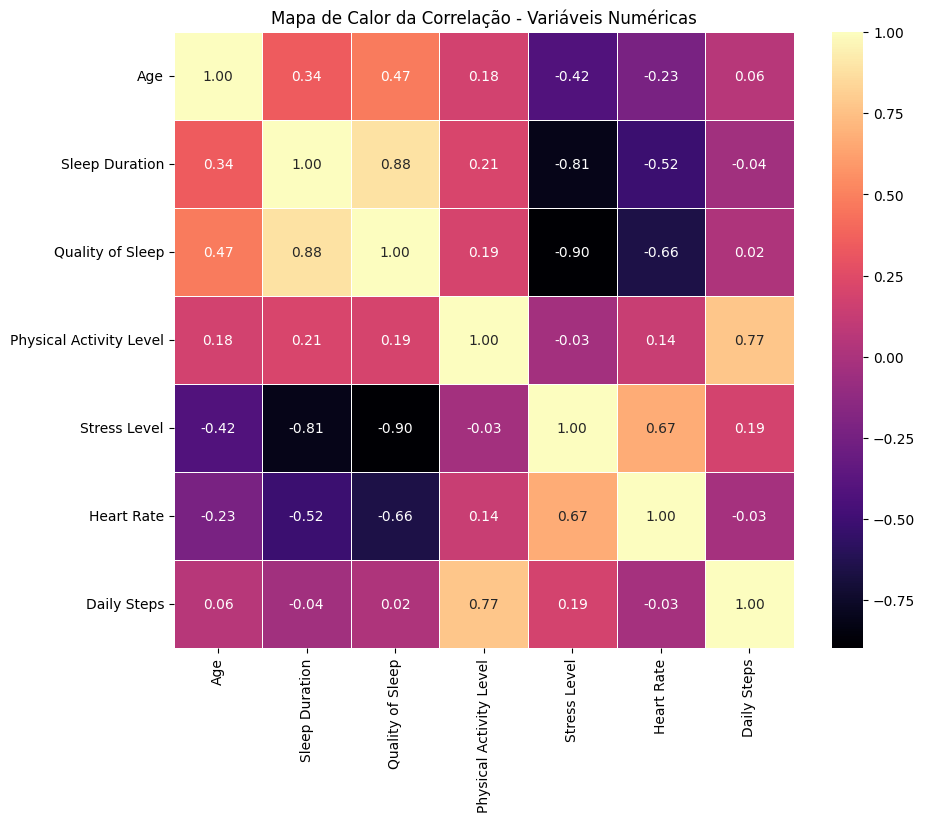

In [ ]:
# Cria o mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,       # mostra os valores dentro dos quadrados
    fmt=".2f",        # 2 casas decimais
    cmap='magma',  # paleta de cores
    linewidths=0.5    # linhas divisórias entre os quadrados
)
plt.title('Mapa de Calor da Correlação - Variáveis Numéricas')
plt.show()

In [ ]:
# exibindo as variaveis que tem maior correlacao com a variavel alvo "Quality of Sleep"
corr_qos = corr_matrix['Quality of Sleep'].sort_values(ascending=False)
print(corr_qos)

Quality of Sleep           1.000000
Sleep Duration             0.883213
Age                        0.473734
Physical Activity Level    0.192896
Daily Steps                0.016791
Heart Rate                -0.659865
Stress Level              -0.898752
Name: Quality of Sleep, dtype: float64


###Avaliando multicolinearidade

In [ ]:
## Identificando quais variáveis numéricas preditoras têm alta correlação entre si

# transforma a matriz para uma coluna única  e filtrando
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ['Variavel 1', 'Variavel 2', 'Correlacao']

# Excluindo diagonal e pares com a variável alvo
corr_pairs = corr_pairs[
    (corr_pairs['Variavel 1'] != corr_pairs['Variavel 2']) &
    (~corr_pairs['Variavel 1'].isin(['Quality of Sleep'])) &
    (~corr_pairs['Variavel 2'].isin(['Quality of Sleep']))
]
corr_pairs['AbsCorr'] = np.abs(corr_pairs['Correlacao'])
corr_pairs = corr_pairs.sort_values(by='AbsCorr', ascending=False)

# Mostrando só as que tem forte correlacao entre as variveis explicativas
corr_fortes = corr_pairs[corr_pairs['AbsCorr'] > 0.7]
print(corr_fortes)

                 Variavel 1               Variavel 2  Correlacao   AbsCorr
11           Sleep Duration             Stress Level   -0.811023  0.811023
29             Stress Level           Sleep Duration   -0.811023  0.811023
27  Physical Activity Level              Daily Steps    0.772723  0.772723
45              Daily Steps  Physical Activity Level    0.772723  0.772723


- Com a matriz de correlação, identificamos que **seis variáveis** são explicativas para a variável alvo:
  - *Sleep Duration*
  - *Age*
  - *Physical Activity Level*
  - *Daily Steps*
  - *Heart Rate*
  - *Stress Level*

- Na avaliação dos **pares de variáveis preditoras**, com o objetivo de evitar **multicolinearidade**, verificamos que os pares *Sleep Duration* e *Stress Level*, e *Physical Activity Level* e *Daily Steps* apresentam alta correlação entre si. Assim, optamos por considerar apenas uma variável de cada par no modelo:
  - *Stress Level* e *Physical Activity Level*

- Com isso, chegamos às **quatro variáveis numéricas explicativas selecionadas**:
  - *Age*
  - *Physical Activity Level*
  - *Heart Rate*
  - *Stress Level*

### Gráficos

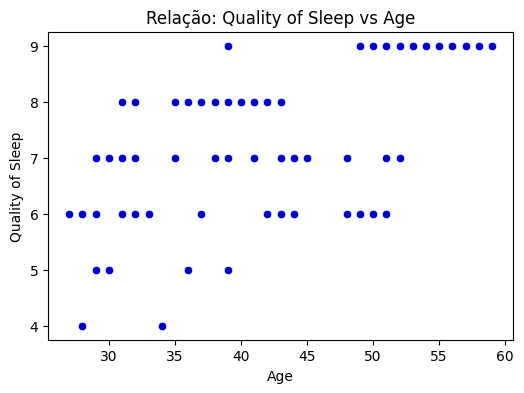

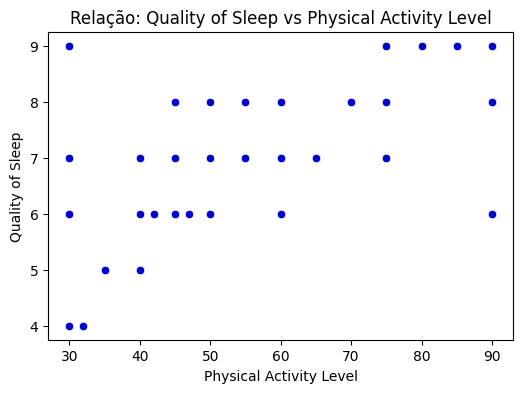

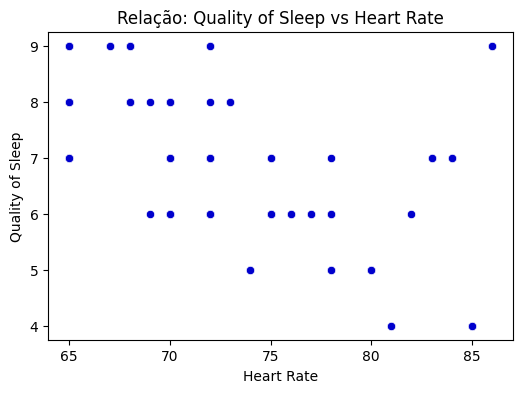

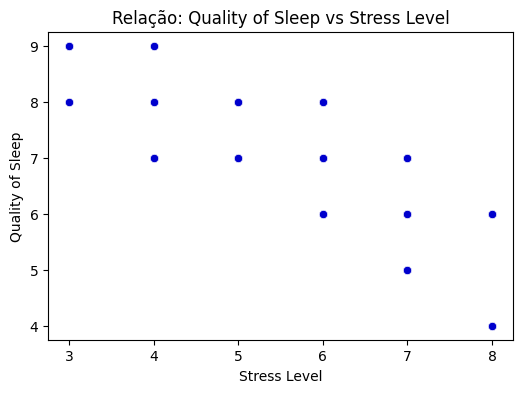

In [ ]:
# Lista das variáveis explicativas
var_numericas = ['Age', 'Physical Activity Level', 'Heart Rate', 'Stress Level']

# Loop para gerar um scatter plot para cada uma em relação à Quality of Sleep
for var_numericas in var_numericas:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_sono, x=var_numericas, y='Quality of Sleep', color='mediumblue')
    plt.title(f'Relação: Quality of Sleep vs {var_numericas}')
    plt.xlabel(var_numericas)
    plt.ylabel('Quality of Sleep')
    plt.show()

##7.2.Variaveis Categóricas

In [ ]:
#selecinando as colunas categoricas
var_categoricas = df_sono.select_dtypes(include=['object'])
var_categoricas.columns

Index(['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder',
       'Pressao_Arterial_OMS'],
      dtype='object')

In [ ]:
# Classificação da Qualidade de Sono de acordo com o escopo do projeto
def classificar_sono(valor):
    if valor <= 4:
        return 'Ruim'
    elif valor <= 6:
        return 'Moderada'
    else:
        return 'Boa'

df_sono['Qualidade Sono Cat'] = df_sono['Quality of Sleep'].apply(classificar_sono)

### Teste Qui-quadrado

In [ ]:
# Teste Qui-quadrado para entender a correlacao entre as variaves categoricas e a variavel alvo

resultados = [] # Lista para guardar os resultados
for var in var_categoricas:
    tabela = pd.crosstab(df_sono[var], df_sono['Qualidade Sono Cat']) # Tabela de contingência
    chi2, p, dof, ex = chi2_contingency(tabela) # Teste Qui-quadrado
    interpretacao = 'Associação significativa' if p < 0.05 else 'Sem associação significativa'
    resultados.append({
        'Variável': var,
        'Qui-quadrado': round(chi2, 3),
        'p-valor': round(p, 4),
        'Interpretação': interpretacao
    })

# Converter em DataFrame
resultados_df = pd.DataFrame(resultados)

# Mostrar resultados
print(resultados_df)

               Variável  Qui-quadrado  p-valor             Interpretação
0                Gender        11.031    0.004  Associação significativa
1            Occupation       407.375    0.000  Associação significativa
2          BMI Category       109.769    0.000  Associação significativa
3        Sleep Disorder        48.491    0.000  Associação significativa
4  Pressao_Arterial_OMS        32.569    0.000  Associação significativa


- Com o teste Qui-quadrado, verificamos que **todas as variáveis categóricas** apresentam associação estatística com a variável alvo. Portanto, todas serão consideradas na modelagem.
- Variáveis categóricas selecionadas:
  - *Gender*
  - *Occupation*
  - *BMI Category*
  - *Sleep Disorder*
  - *Pressao_Arterial_OMS*
  - *Qualidade Sono Cat* (variável alvo)

### Analisando a granulosidade das colunas categóricas

In [ ]:
df_sono['Qualidade Sono Cat'].value_counts()

,count
Qualidade Sono Cat,
Boa,257
Moderada,112
Ruim,5


In [ ]:
#Selecionando colunas categoricas
var_categoricas = df_sono.select_dtypes(include=['object']).columns.tolist()

# Remove o nome da lista
var_categoricas.remove('Qualidade Sono Cat')

for col in var_categoricas:
    print(f'\n=== {col} ===')
    print(df_sono[col].value_counts(dropna=False))
    print(f'Únicos: {df_sono[col].nunique()}')


=== Gender ===
Gender
Male      189
Female    185
Name: count, dtype: int64
Únicos: 2

=== Occupation ===
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
Únicos: 11

=== BMI Category ===
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
Únicos: 4

=== Sleep Disorder ===
Sleep Disorder
Sem Distúrbio    219
Sleep Apnea       78
Insomnia          77
Name: count, dtype: int64
Únicos: 3

=== Pressao_Arterial_OMS ===
Pressao_Arterial_OMS
Pré-hipertensão          137
Normal Alta              125
Hipertensão Estágio 1     71
Normal                    41
Name: count, dtype: int64
Únicos: 4


- Temos variáveis categóricas com granularidade alta — ou seja, com muitas categorias distintas — o que pode causar problemas no modelo, principalmente aumentando o risco de overfitting.
- Por isso, precisamos fazer agrupamentos lógicos e reunindo categorias raras em grupos mais genéricos.

####Agrupamento da variável Occupation

In [ ]:
def map_ocupacao(x):
    if x in ['Engineer', 'Scientist', 'Software Engineer']:
        return 'Tecnologia'
    elif x == 'Lawyer':
        return 'Juridico'
    elif x == 'Teacher':
        return 'Educacao'
    elif x == 'Accountant':
        return 'Contabilidade'
    elif x in ['Salesperson', 'Sales Representative', 'Manager']:
        return 'Vendas_Gerencia'
    elif x == 'Nurse':
        return 'Nurse'
    elif x == 'Doctor':
        return 'Doctor'
    else:
        return 'Outros'

df_sono['Occupation_Grouped'] = df_sono['Occupation'].apply(map_ocupacao)
#df_sono.drop('Occupation', axis=1, inplace=True) #Excluindo a coluna original

In [ ]:
#novas categorias e quantidade dos valores, apos agrupamento
df_sono['Occupation_Grouped'].value_counts()

,count
Occupation_Grouped,
Nurse,73
Doctor,71
Tecnologia,71
Juridico,47
Educacao,40
Contabilidade,37
Vendas_Gerencia,35


Antes do agrupamento, a variável apresentava 11 categorias distintas, com algumas pouco frequentes, como *Scientist*, *Software Engineer* e *Manager*.

Após o agrupamento, as categorias foram consolidadas em grupos funcionais principais:

- **Saúde**: Nurse e Doctor  
- **Tecnologia**: Engineer, Scientist e Software Engineer  
- **Jurídico**: Lawyer  
- **Educação**: Teacher  
- **Contabilidade**: Accountant  
- **Vendas e Gerência**: Salesperson, Sales Representative e Manager   

Esse agrupamento visa reduzir a granularidade e evitar o overfitting, facilitando a interpretação do modelo.

#### Agrupamento da variável BMI Category

In [ ]:
def map_bmi(x):
    if x in ['Normal', 'Normal Weight']:
        return 'Normal'
    elif x in ['Obese', 'Overweight']:
        return 'Acima_Peso'
    else:
        return 'Outro'

df_sono['BMI_Category_Grouped'] = df_sono['BMI Category'].apply(map_bmi)
#df_sono.drop('BMI Category', axis=1, inplace=True)


Antes do agrupamento, a variável apresentava **4** categorias distintas com as seguintes frequências:

| Categoria      | Contagem |
|----------------|----------|
| Normal         | 195      |
| Overweight     | 148      |
| Normal Weight  | 21       |
| Obese          | 10       |

Após o agrupamento, foram criadas **duas** categorias principais:

- **Normal**: combinação das categorias *Normal* e *Normal Weight* (totalizando 216 registros).
- **Acima_Peso**: combinação das categorias *Overweight* e *Obese* (totalizando 158 registros).

Esse agrupamento simplifica a granularidade da variável, facilitando a modelagem e a interpretação dos resultados, além de evitar possíveis problemas com categorias pouco frequentes.

In [ ]:
df_sono['BMI_Category_Grouped'].value_counts()

,count
BMI_Category_Grouped,
Normal,216
Acima_Peso,158


#### Agrupamento da variável Sleep Disorder

In [ ]:
# Agrupar Apneia e Insônia em uma única categoria textual
df_sono['Sleep_Disorder_Grouped'] = df_sono['Sleep Disorder'].apply(
    lambda x: 'Tem Distúrbio' if x != 'Sem Distúrbio' else 'Sem Distúrbio'
)
#df_sono.drop('Sleep Disorder', axis=1, inplace=True)

# Verificar resultado
print(df_sono['Sleep_Disorder_Grouped'].value_counts())


Sleep_Disorder_Grouped
Sem Distúrbio    219
Tem Distúrbio    155
Name: count, dtype: int64


Antes do agrupamento, a variável apresentava 3 categorias:

- Sem Distúrbio: 219 registros
- Sleep Apnea: 78 registros
- Insomnia: 77 registros

Após o agrupamento, as categorias *Sleep Apnea* e *Insomnia* foram unificadas em uma única categoria **Tem Distúrbio**, resultando em:

- Sem Distúrbio: 219 registros
- Tem Distúrbio: 155 registros

Esse agrupamento simplifica a variável, destacando apenas a presença ou ausência de distúrbio do sono, o que facilita a interpretação e a codificação na etapa de modelagem.

#8.Tratando os Dados

### Seleção de Variáveis para o Modelo

Após realizarmos uma análise de **correlação** entre as variáveis numéricas, verificação de **multicolinearidade** e **tratamento de granularidade** nas variáveis categóricas — agrupando categorias com baixa representatividade — definimos inicialmente um conjunto mais amplo de variáveis para alimentar os modelos de machine learning.

Esse conjunto incluía:

**Variáveis numéricas iniciais:**
- `Age`
- `Physical Activity Level`
- `Heart Rate`
- `Stress Level`

**Variáveis categóricas iniciais:**
- `Gender`
- `Occupation_Grouped`
- `BMI_Category_Grouped`
- `Sleep_Disorder_Grouped`
- `Pressao_Arterial_OMS`

**Variável alvo:**
- `Qualidade Sono Cat`

---

No entanto, ao aplicar esse conjunto mais completo nos modelos, percebemos sinais de **overfitting**.  
Isso pode ser explicado principalmente por dois fatores:

1. A alta complexidade do modelo em relação ao tamanho reduzido da base de dados.
2. A presença de variáveis que, de certa forma, poderiam estar **repetindo ou mascarando informações** já contidas na variável alvo — o que pode confundir o modelo ao invés de contribuir com novas evidências.

---

Para reduzir esse risco e simplificar o modelo, decidimos **diminuir o número de variáveis preditoras**, priorizando aquelas com **impacto prático direto no projeto**.  
Ou seja, optamos por manter apenas as variáveis mais relevantes para os **alertas personalizados** que o sistema poderá gerar para ajudar os usuários a melhorar a qualidade do sono.

---

### Conjunto Final de Variáveis Utilizadas

**Variáveis numéricas:**
- `Age`
- `Physical Activity Level`

**Variáveis categóricas:**
- `Gender`
- `BMI_Category_Grouped`
- `Sleep_Disorder_Grouped`

**Variável alvo:**
- `Qualidade Sono Cat`



In [ ]:
##DataFrame final, para aplicar no modelo
df_filtrado = df_sono[
    [
        'Age',
        'Physical Activity Level',
        'Gender',
        'BMI_Category_Grouped',
        'Sleep_Disorder_Grouped',
        'Qualidade Sono Cat'
    ]
]

Convertendo as variáveis categóricas em variáveis numéricas binárias (dummies).

In [ ]:
df_features =pd.get_dummies(df_filtrado, columns=[
        'Gender',
        'BMI_Category_Grouped',
        'Sleep_Disorder_Grouped',
        ],dtype=int,drop_first=True)

In [ ]:
df_features['Qualidade Sono Cat'].value_counts()

,count
Qualidade Sono Cat,
Boa,257
Moderada,112
Ruim,5


#9.Regressao logistica Multinomial





## 9.1.Definindo variáveis preditoras e alvo

In [ ]:
# x contem as variaveis explicativas
X = df_features.drop('Qualidade Sono Cat', axis=1)

# y contem a variavel de interesse
y = df_features['Qualidade Sono Cat']

## 9.2.Separando treino (80%) e teste (20%)

In [ ]:
#Difisao da base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- Random_state=42 -> Garante que a divisão dos dados será sempre a mesma toda vez que rodar o código (reprodutibilidade).
- Stratify=y -> Garante que a proporção das classes em y será mantida nos dois conjuntos (treino e teste).
- Isso é importante em problemas de classificação, principalmente quando há classes desbalanceada, evitando que o modelo aprenda com dados desbalanceados.

## 9.2.Balanceando as classes na base de treino

In [ ]:
# Verificando a quantidade de classes na base de treino
print("Distribuição antes do SMOTE:", Counter(y_train))

Distribuição antes do SMOTE: Counter({'Boa': 205, 'Moderada': 90, 'Ruim': 4})


In [ ]:
#Aplicar SMOTE no conjunto de treino para balancear classes (oversampling)
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
# Verificando a quantidade de classes na base de treino apos banceamento
print("Distribuição após o SMOTE:", Counter(y_train_res))

Distribuição após o SMOTE: Counter({'Boa': 205, 'Moderada': 205, 'Ruim': 205})


-	Identificamos que nossa variável alvo estava desbalanceada: ‘Boa’: 205, ‘Moderada’: 90, ‘Ruim’: 4 — o que não é o ideal para testar o modelo de forma justa.
- Foi aplicado o recurso de oversampling, que cria amostras sintéticas para equilibrar as classes na base de treino.
- É fundamental aplicar o balanceamento somente na base de treino, para evitar vazamento de informações para o teste.
- Após o balanceamento, as classes ficaram balanceadas: ‘Boa’: 205, ‘Moderada’: 205, ‘Ruim’: 205.

##9.3.Instanciando e treinando o modelo multinomial com dados balanceados

In [ ]:
#Instanciar e treinar o modelo multinomial com classes balanceados
logreg = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=5000)
logreg.fit(X_train_res, y_train_res)


LogisticRegression(class_weight='balanced', max_iter=5000)

Previsoes do modelo

In [ ]:
# Fazendo previsões no conjunto de teste original (não balanceado)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1] ### previsao da probabilidade

In [ ]:
# Cria uma cópia para armazenar resultados
X_test_resultado = X_test.copy()
X_test_resultado["Previsao_Modelo"] = y_pred
X_test_resultado["Probabilidade"] = y_pred_proba
X_test_resultado

,Age,Physical Activity Level,Gender_Male,BMI_Category_Grouped_Normal,Sleep_Disorder_Grouped_Tem Distúrbio,Previsao_Modelo,Probabilidade
100,36,60,0,1,0,Boa,0.154875
156,39,60,1,1,0,Boa,0.205005
302,51,55,0,1,0,Boa,0.020756
366,59,75,0,0,1,Boa,0.229739
200,43,45,1,0,1,Moderada,0.927907
...,...,...,...,...,...,...,...
335,54,30,0,1,0,Boa,0.021269
112,37,60,0,1,0,Boa,0.136224
1,28,60,1,1,0,Moderada,0.573535
363,59,75,0,0,1,Boa,0.229739


##9.4.Performance do Modelo

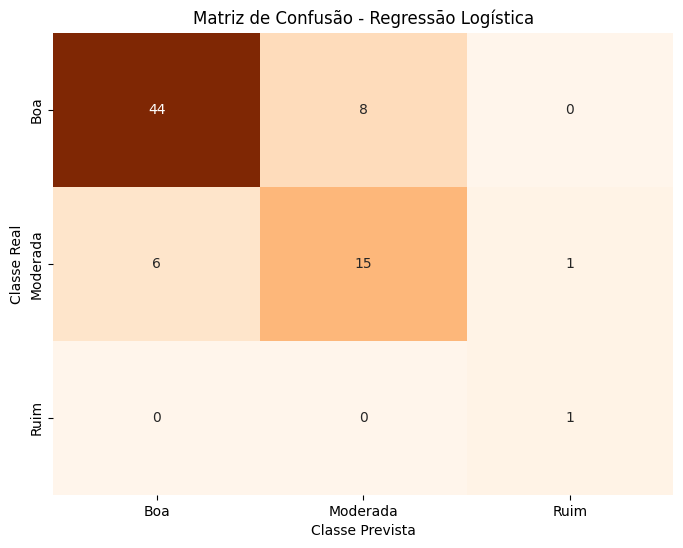

Acurácia: 0.8
Precisão (weighted): 0.808
Recall (weighted): 0.8
F1-score (weighted): 0.803


In [ ]:
# Calculando matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Calculando métricas com average apropriado
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g', cbar=False,
            xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão - Regressāo Logística')
plt.show()

# Imprimindo as métricas
print("Acurácia:", round(accuracy, 3))
print("Precisão (weighted):", round(precision, 3))
print("Recall (weighted):", round(recall, 3))
print("F1-score (weighted):", round(f1, 3))

##9.5.Variáveis mais relevantes para o modelo por classes

In [ ]:
#!pip install jupyter_bokeh

In [ ]:

coef = logreg.coef_
classes = logreg.classes_
features = X_train_res.columns

pn.extension('plotly')
# Cria uma lista de FigureWidgets para cada classe
tabs = []

for idx, classe in enumerate(classes):
    coef_classe = coef[idx]
    indices = np.argsort(np.abs(coef_classe))
    top_features = features[indices][-10:]
    top_importances = coef_classe[indices][-10:]

    df_plot = pd.DataFrame({
        'Feature': top_features,
        'Coeficiente': top_importances
    }).sort_values('Coeficiente')

    fig = px.bar(
        df_plot,
        x='Coeficiente',
        y='Feature',
        orientation='h',
        color='Coeficiente',
        color_continuous_scale=['red', 'darkorange'],
        title=f'Top 10 Coeficientes - Classe: {classe}- Regressāo Logistica',
        template='plotly_white'
    )

    tabs.append((
        f"Classe: {classe}",
        pn.pane.Plotly(fig, config={'responsive': True})
    ))

pn.Tabs(*tabs).servable()

/tmp/ipython-input-47-1353867406.py:5: UserWarning:

Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.



Tabs
    [0] Plotly(Figure, config={'responsive': True})
    [1] Plotly(Figure, config={'responsive': True})
    [2] Plotly(Figure, config={'responsive': True})

## 9.6.Análise Geral — Regressao Logística
- Coeficientes positivos indicam que o aumento da variável está associado a uma maior probabilidade da classe correspondente.
- Coeficientes negativos indicam associação inversa àquela classe.

- Pela regressão logística, identificamos as principais variáveis associadas à classe Ruim:
 -	✅ Distúrbio do sono: ter algum distúrbio aumenta significativamente o risco de sono ruim.
 -	✅ Atividade física: níveis mais altos de atividade física reduzem o risco.
 -	✅ IMC normal: estar dentro do peso normal também reduz a chance de sono ruim.
 -	✅ Idade e gênero: podem ter relação, mas ações diretas são menos práticas aqui.


In [ ]:
# Pega top 10 geral
abs_sum = np.sum(np.abs(coef), axis=0)
indices = np.argsort(abs_sum)[-10:]
top_features = features[indices]

# Cabeçalho da tabela
header = ["Feature"] + [f"Coef. {classe}" for classe in classes]
print("{:<25} {:>12} {:>12} {:>12}".format(*header))

# Separador
print("-" * 65)

# Linhas da tabela
for feat in top_features:
    idx_feat = list(features).index(feat)
    valores = []
    for i in range(len(classes)):
        val = coef[i][idx_feat]
        valores.append(f"{val:.4f}")
    print("{:<25} {:>12} {:>12} {:>12}".format(feat, *valores))

Feature                      Coef. Boa Coef. Moderada   Coef. Ruim
-----------------------------------------------------------------
Age                             0.2591       0.1089      -0.3680
Physical Activity Level         0.3199       0.3008      -0.6207
Gender_Male                     0.6155       1.4075      -2.0231
Sleep_Disorder_Grouped_Tem Distúrbio      -1.8508      -0.1752       2.0260
BMI_Category_Grouped_Normal       2.6805       0.1304      -2.8109


#10.Árvore de Decisão


=== Árvore de Decisão ===
Acurácia: 0.947
Precisão: 0.949
Recall: 0.947
F1-score: 0.947


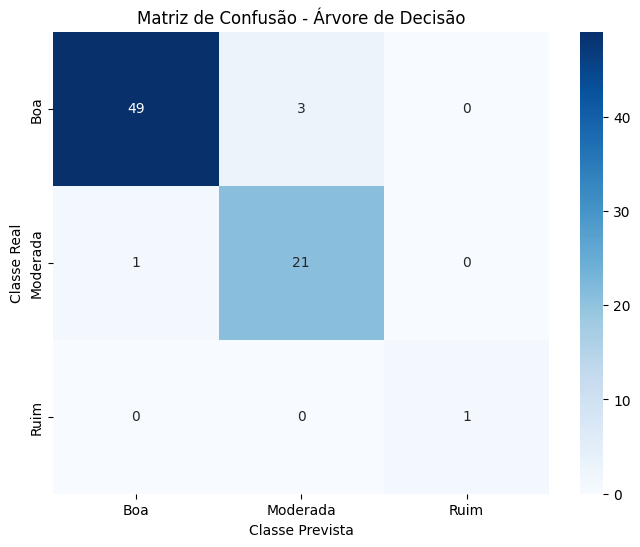

In [ ]:
arvore = DecisionTreeClassifier(
    max_depth=5,# Limita quantos splits empilhados a árvore pode fazer
    min_samples_leaf=10, #Impede que a árvore crie folhas finais com menos de 10 registros.
    random_state=42
)
arvore.fit(X_train_res, y_train_res)

# Previsão no conjunto de teste original
y_pred_arvore = arvore.predict(X_test)

# Métricas Árvore
cm_arvore = confusion_matrix(y_test, y_pred_arvore)
accuracy_arvore = accuracy_score(y_test, y_pred_arvore)
precision_arvore = precision_score(y_test, y_pred_arvore, average='weighted')
recall_arvore = recall_score(y_test, y_pred_arvore, average='weighted')
f1_arvore = f1_score(y_test, y_pred_arvore, average='weighted')

print("\n=== Árvore de Decisão ===")
print("Acurácia:", round(accuracy_arvore, 3))
print("Precisão:", round(precision_arvore, 3))
print("Recall:", round(recall_arvore, 3))
print("F1-score:", round(f1_arvore, 3))
# print("Classification Report:")
# print(classification_report(y_test, y_pred_arvore))

# Matriz de confusão Árvore
plt.figure(figsize=(8, 6))
sns.heatmap(cm_arvore, annot=True, cmap='Blues', fmt='g',
            xticklabels=arvore.classes_, yticklabels=arvore.classes_)
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()


##10.1.Variáveis mais relevantes para o modelo

In [ ]:
# Ativa a extensão Plotly para o Panel
pn.extension('plotly')

# Pega as importâncias
importancias = arvore.feature_importances_
features = X_train_res.columns

# Cria DataFrame
df_importancia = pd.DataFrame({
    'Feature': features,
    'Importancia': importancias
}).sort_values('Importancia', ascending=True).head(10)

# Cria gráfico
fig = px.bar(
    df_importancia,
    x='Importancia',
    y='Feature',
    orientation='h',
    color='Importancia',
    color_continuous_scale=['red', 'darkblue'],
    title='Importâncias - Árvore de Decisão',
    template='plotly_white'
)

# Exibe o gráfico no Panel
pn.pane.Plotly(fig).servable()

/tmp/ipython-input-50-3140141127.py:2: UserWarning:

Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.



Plotly(Figure)

##10.1. Análise Geral — Árvore de Decisão

- As **importâncias** da árvore mostram quais variáveis foram mais usadas para separar as classes de qualidade de sono.
- Quanto **maior a importância**, maior a influência dessa variável na decisão final.

**Principais variáveis:**
- ✅ **IMC normal (`BMI_Category_Grouped_Normal`)** — maior relevância na árvore.
- ✅ **Atividade física (`Physical Activity Level`)** — também muito relevante.
- ✅ **Idade (`Age`)** — impacto moderado.
- 🚫 **Distúrbio do sono** e **Gênero** — não foram usados nos splits desta árvore (importância zero).


#11.Modelo Random Forest


=== Random Forest ===
Acurácia: 0.947
Precisão: 0.947
Recall: 0.947
F1-score: 0.947


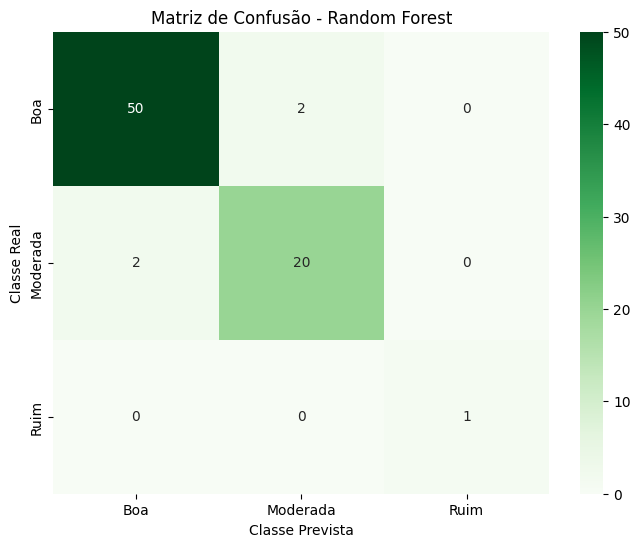

In [ ]:
floresta = RandomForestClassifier(
    max_depth=5, # Limita quantos splits empilhados a árvore pode fazer
    min_samples_leaf=10, #  Impede que a árvore crie folhas finais com menos de 10 registros.
    random_state=42
)
floresta.fit(X_train_res, y_train_res)

# Previsão Random Forest
y_pred_floresta = floresta.predict(X_test)

# Métricas Random Forest
cm_floresta = confusion_matrix(y_test, y_pred_floresta)
accuracy_floresta = accuracy_score(y_test, y_pred_floresta)
precision_floresta = precision_score(y_test, y_pred_floresta, average='weighted')
recall_floresta = recall_score(y_test, y_pred_floresta, average='weighted')
f1_floresta = f1_score(y_test, y_pred_floresta, average='weighted')

print("\n=== Random Forest ===")
print("Acurácia:", round(accuracy_floresta, 3))
print("Precisão:", round(precision_floresta, 3))
print("Recall:", round(recall_floresta, 3))
print("F1-score:", round(f1_floresta, 3))
# print("Classification Report:")
# print(classification_report(y_test, y_pred_floresta))

# Matriz de confusão Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_floresta, annot=True, cmap='Greens', fmt='g',
            xticklabels=floresta.classes_, yticklabels=floresta.classes_)
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")
plt.show()

##11.1 Variáveis mais relevantes para o modelo

In [ ]:
# Ativa extensão Plotly para Panel
pn.extension('plotly')

# Pega as importâncias do modelo já treinado
importancias_floresta = floresta.feature_importances_
features_floresta = X_train_res.columns

# Cria DataFrame com as 10 principais
df_importancia_floresta = pd.DataFrame({
    'Feature': features_floresta,
    'Importancia': importancias_floresta
}).sort_values('Importancia', ascending=True).head(10)

# Gráfico
fig_floresta = px.bar(
    df_importancia_floresta,
    x='Importancia',
    y='Feature',
    orientation='h',
    color='Importancia',
    color_continuous_scale=['red', 'darkgreen'],
    title='Importâncias - Random Forest',
    template='plotly_white'
)

# Exibe no Panel
pn.pane.Plotly(fig_floresta).servable()

/tmp/ipython-input-52-1348803444.py:2: UserWarning:

Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.



Plotly(Figure)

##11.2.Análise Geral — Random Forest

- As **importâncias das variáveis** no modelo Random Forest indicam o quanto cada variável contribui para a tomada de decisão em múltiplas árvores.

**Principais variáveis:**
- ✅ **Atividade física (`Physical Activity Level`)** — maior importância no modelo.
- ✅ **Idade (`Age`)** — também com peso relevante.
- ✅ **IMC normal (`BMI_Category_Grouped_Normal`)** — importante para discriminar classes.
- ✅ **Distúrbio do sono (`Sleep_Disorder_Grouped_Tem Distúrbio`)** — influencia o modelo, diferente da árvore de decisão simples.
- ✅ **Gênero (`Gender_Male`)** — menor, mas presente influência.


In [ ]:
#Comparação geral
print("\n=== Comparação de Modelos ===")
print(f"{'Modelo':<15} {'Acurácia':<10} {'Precisão':<10} {'Recall':<10} {'F1-score':<10}")
print("-"*55)
print(f"{'Regressão ':<15} {round(accuracy, 3):<10} {round(precision, 3):<10} {round(recall, 3):<10} {round(f1, 3):<10}")
print(f"{'Árvore ':<15} {round(accuracy_arvore, 3):<10} {round(precision_arvore, 3):<10} {round(recall_arvore, 3):<10} {round(f1_arvore, 3):<10}")
print(f"{'Random ':<15} {round(accuracy_floresta, 3):<10} {round(precision_floresta, 3):<10} {round(recall_floresta, 3):<10} {round(f1_floresta, 3):<10}")


=== Comparação de Modelos ===
Modelo          Acurácia   Precisão   Recall     F1-score  
-------------------------------------------------------
Regressão       0.8        0.808      0.8        0.803     
Árvore          0.947      0.949      0.947      0.947     
Random          0.947      0.947      0.947      0.947     


#12.Conclusão

Após selecionar um subconjunto mais enxuto de variáveis explicativas — **`Age`**, **`Physical Activity Level`**, **`Gender`**, **`BMI_Category_Grouped`** e **`Sleep_Disorder_Grouped`** — observamos que a **Regressão Logística Multinomial** apresentou uma redução de desempenho, com **acurácia em torno de 80%**, enquanto **Árvore de Decisão** e **Random Forest** mantiveram alta performance (**~94%** em todas as métricas).

Essa diferença mostra que, mesmo com menos variáveis, **modelos de árvore capturam interações e padrões não lineares** que a regressão não explica completamente. Portanto, para este cenário, a **Random Forest se mostra mais adequada**, oferecendo **melhor previsão, robustez a overfitting** e boa generalização, mesmo em uma base pequena.

A **Regressão Logística**, apesar de mais interpretável, **não é a melhor escolha** para previsão neste caso, mas pode ser útil se o foco for **explicar o peso de cada variável** individualmente.

- Métricas Relevantes:
  - Recall (Sensibilidade) é crítico ➜ É melhor gerar mais alertas do que não detectar quem precisa de atenção.
  - F1-Score e Precisão completam a avaliação para garantir bom equilíbrio.

- Principais Variáveis Impactantes
  - Atividade física: foi o principal fator identificado no modelo. Níveis mais altos estão associados a melhor qualidade do sono.
  - Idade: teve grande influência, indicando que o risco pode variar de acordo com a faixa etária.
  - IMC: estar dentro da faixa considerada normal ajuda a reduzir o risco de má qualidade do sono.
  - Distúrbios do sono: a presença de apneia, insônia ou outros distúrbios aumenta a chance de sono ruim, mesmo com impacto um pouco menor que os fatores anteriores.
  - Gênero: o gênero masculino apareceu entre os fatores relevantes, embora com menor impacto.

### Recomendações de Alertas com Base nos Dados Analisados

Com base nas variáveis mais relevantes identificadas pelo modelo, sugerimos os seguintes tipos de alertas e funcionalidades para o sistema, com exemplos práticos de aplicação:

- **Atividade física (principal fator)**  
  Sugerir **metas semanais** e integrar o sistema a **apps fitness**, incentivando hábitos saudáveis.  
  *Exemplo:* “Você praticou apenas 60 minutos de atividade física nesta semana. Que tal uma caminhada de 30 minutos hoje para atingir sua meta semanal?”

- **Segmentação por faixa etária**  
  Adaptar **alertas e orientações** conforme a idade do usuário, **priorizando grupos de maior risco**.  
  *Exemplo (Jovens Adultos):* "Que tal experimentar uma rotina de relaxamento antes de dormir, como leitura ou meditação?”

- **Monitoramento do IMC**  
  Emitir **alertas personalizados** para usuários fora da **faixa saudável de peso**, com sugestões preventivas.  
  *Exemplo:* “Uma alimentação equilibrada e atividades leves diárias podem melhorar seu sono e bem-estar.”

- **Detecção de distúrbios do sono**  
  Tratar sinais como **apneia** e **insônia** como **indicadores de atenção complementar**.  
  *Exemplo:* “Detectamos padrões que podem indicar apneia do sono. Considere procurar um especialista para um diagnóstico mais detalhado.”

- **Personalização por gênero**  
  Ajustar alertas e conteúdos com base no perfil de gênero, considerando **diferenças identificadas na análise**.  
  *Exemplo (Homens):* “Baixo nível de atividade física tende a influenciar a qualidade do seu sono. Mantenha-se ativo e monitore seus hábitos noturnos.”

- **Painel de risco individualizado**  
  Exibir um **score de risco personalizado**, destacando os **principais fatores que afetam o usuário**.  
  *Exemplo:* “Seu risco atual de sono ruim está em nível moderado. Fatores mais relevantes: baixo nível de atividade física e distúrbio do sono identificado.”